In [2]:
#no preprocessing needed as there are only numerical features

In [3]:
#target variable --> 0 = no disease and 1 = disease.

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('heart.csv')

In [6]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [7]:
from sklearn.model_selection import train_test_split

X, y = df.drop('target', axis=1),df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=9)

In [9]:
### Scale-Insensitive 

In [11]:
from sklearn.ensemble import RandomForestClassifier

forest =  RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
from sklearn.naive_bayes import GaussianNB

nb_clf =  GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB()

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf =  GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [14]:
### Scale-Sensisitve

In [15]:
from sklearn.preprocessing import StandardScaler

scaler =  StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [17]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train_scaled, y_train)

LogisticRegression()

In [18]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_scaled, y_train)

SVC()

In [19]:
forest.score(X_test, y_test)

0.9853658536585366

In [21]:
nb_clf.score(X_test, y_test)

0.8463414634146341

In [22]:
gb_clf.score(X_test, y_test)

0.9707317073170731

In [23]:
knn.score(X_test_scaled, y_test)

0.8536585365853658

In [24]:
log.score(X_test_scaled, y_test)

0.8731707317073171

In [25]:
svc.score(X_test_scaled, y_test)

0.9341463414634147

In [26]:
#doing recall to find ALL the patients with heart diseases

In [30]:
from sklearn.metrics import recall_score

y_preds = forest.predict(X_test)
print('Forest:', recall_score(y_test, y_preds))

y_preds = nb_clf.predict(X_test)
print('NB:', recall_score(y_test, y_preds))

y_preds = gb_clf.predict(X_test)
print('GB:', recall_score(y_test, y_preds))

y_preds = knn.predict(X_test_scaled)
print('KNN:', recall_score(y_test, y_preds))

y_preds = log.predict(X_test_scaled)
print('Log:', recall_score(y_test, y_preds))

y_preds = svc.predict(X_test_scaled)
print('SVC:', recall_score(y_test, y_preds))

Forest: 0.9859154929577465
NB: 0.9014084507042254
GB: 0.9859154929577465
KNN: 0.8732394366197183
Log: 0.92018779342723
SVC: 0.9530516431924883


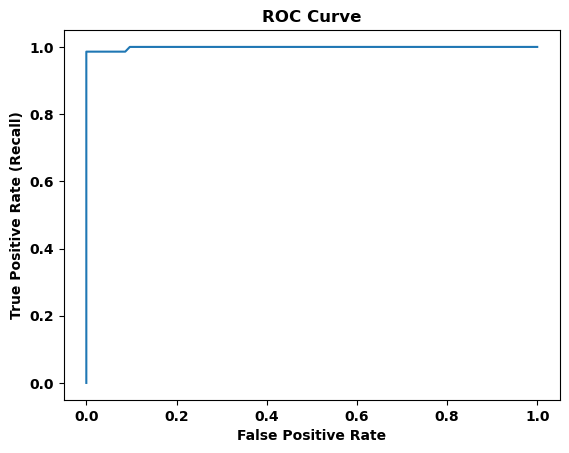

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = forest.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.show()

In [35]:
roc_auc_score(y_test, y_probs)

np.float64(0.9987130907271037)

In [41]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
        'n_estimators': [100,200,500,600,700],
       # 'max_depth': [None, 10, 20, 30],
       #'min_samples_split': [2, 5, 10],
       #'min_samples_leaf': [1, 2, 4],
       #'max_features': ['sqrt', 'log2', None]
}
forest = RandomForestClassifier(n_jobs=1, random_state=9)

grid_search = GridSearchCV(forest, param_grid, cv=3, n_jobs=-1, verbose=2)

In [42]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=1, random_state=9),
             n_jobs=-1, param_grid={'n_estimators': [100, 200, 500, 600, 700]},
             verbose=2)

In [43]:
best_forest = grid_search.best_estimator_

In [44]:
best_forest

RandomForestClassifier(n_estimators=500, n_jobs=1, random_state=9)

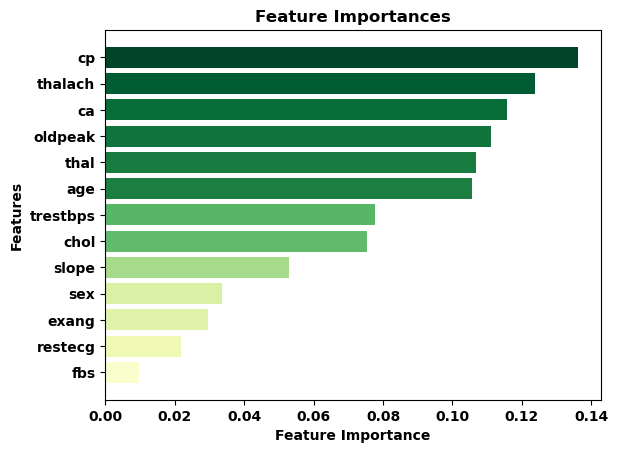

In [45]:
#feature importance
import numpy as np
feature_importances = best_forest.feature_importances_
features= best_forest.feature_names_in_

sorted_idx = np.argsort(feature_importances)
sorted_features = features[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

colors = plt.cm.YlGn(sorted_importances / max(sorted_importances))

plt.barh(sorted_features, sorted_importances, color= colors)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()


<Axes: >

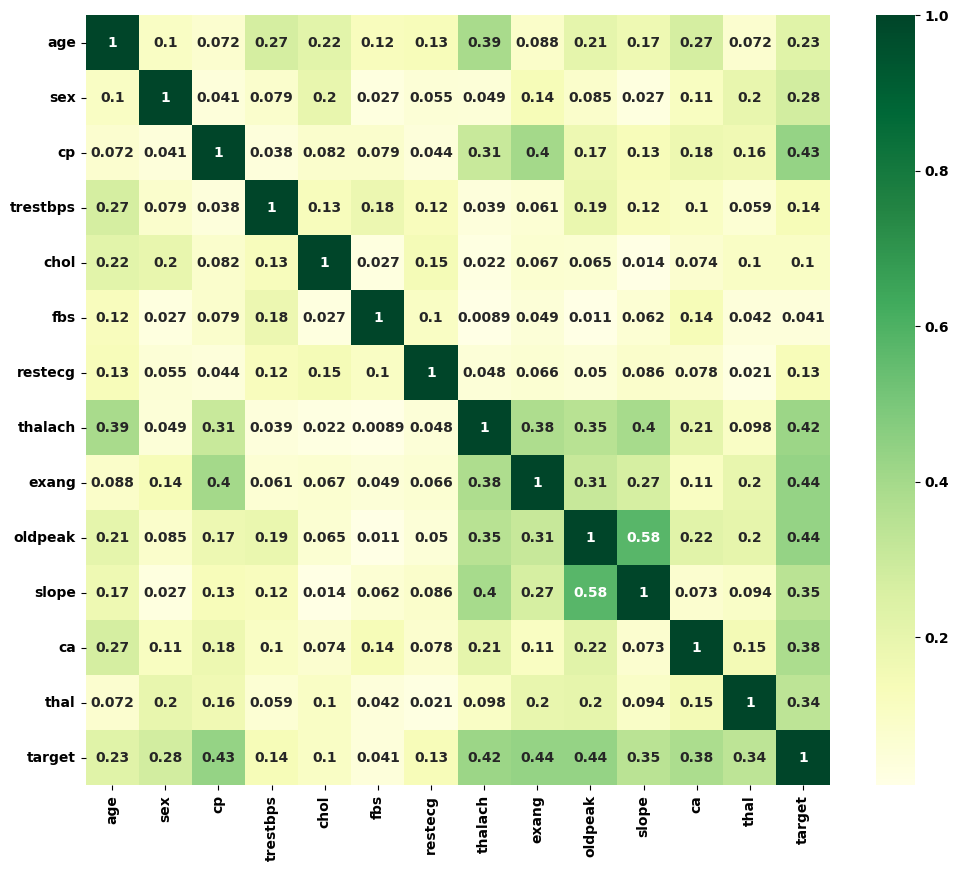

In [48]:
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(abs(df.corr()), annot=True, cmap= 'YlGn')

In [ ]:
#results

In [49]:
best_forest.score(X_test, y_test)

0.9853658536585366

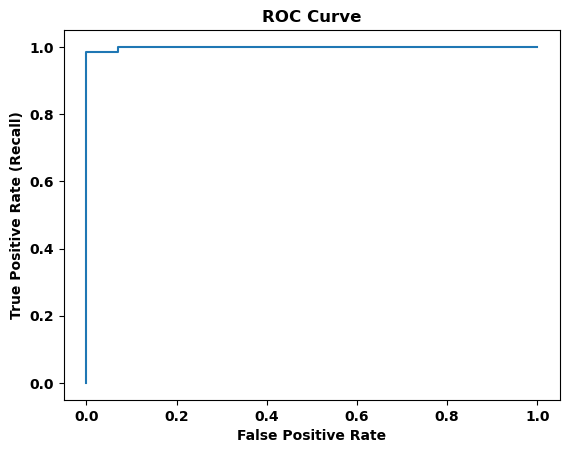

In [50]:
y_probs = best_forest.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.show()

In [51]:
y_preds = best_forest.predict(X_test)
print('Forest:', recall_score(y_test, y_preds))

Forest: 0.9859154929577465
